In [1]:
%load_ext google.cloud.bigquery

In [3]:
%%bigquery total_births
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

In [4]:
%matplotlib inline

In [ ]:
# Movies per start year

In [10]:
%%bigquery movies_count_per_start_year
SELECT start_year, count(1) as movies_count
FROM `edgart-experiments.analytics.movie`
WHERE start_year is not null
GROUP BY start_year
ORDER BY start_year

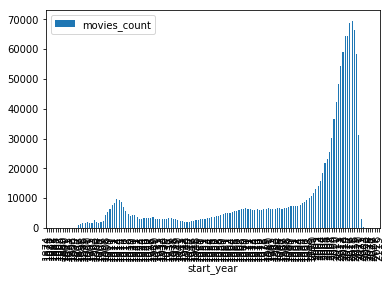

In [9]:
movies_count_per_start_year.plot(kind="bar", x="start_year", y="movies_count")

# Highest profit movies

In [16]:
%%bigquery
SELECT 
tconst,
primary_title,
release_date,
(revenue - budget) as profit
FROM `edgart-experiments.analytics.movie`
WHERE budget > 0 AND revenue > 0
ORDER BY profit desc
LIMIT 10

,tconst,primary_title,release_date,profit
0,tt0499549,Avatar,2009-12-10,2550965087
1,tt4154796,Avengers: Endgame,2019-04-24,2441800564
2,tt0120338,Titanic,1997-11-18,1987463944
3,tt2488496,Star Wars: Episode VII - The Force Awakens,2015-12-15,1823223624
4,tt4154756,Avengers: Infinity War,2018-04-25,1746239637
5,tt0369610,Jurassic World,2015-06-06,1521713208
6,tt6105098,The Lion King,2019-07-12,1396943394
7,tt2820852,Furious 7,2015-04-01,1325047671
8,tt4520988,Frozen II,2019-11-20,1300026933
9,tt0848228,The Avengers,2012-04-25,1299557910


# Most common genre in the top 1000 most profitable movies

In [17]:
%%bigquery
WITH top_1000_profit AS (
  SELECT 
    tconst,
    (revenue - budget) as profit
  FROM `edgart-experiments.analytics.movie`
  WHERE budget > 0 AND revenue > 0
  ORDER BY profit desc
  LIMIT 1000
)
SELECT 
  g.genre,
  COUNT(1) as occurences
FROM top_1000_profit m
JOIN `edgart-experiments.analytics.genre` g ON g.tconst=m.tconst
GROUP BY g.genre
ORDER BY occurences DESC

,genre,occurences
0,adventure,485
1,action,456
2,comedy,405
3,drama,384
4,thriller,299
5,fantasy,201
6,sci-fi,193
7,romance,171
8,crime,161
9,children,158


# Count of LGBT theme throughout years

In [19]:
%%bigquery lgbt_movies_per_start_year
SELECT m.start_year, count(1) as movies_count
FROM `edgart-experiments.analytics.tag` t
JOIN `edgart-experiments.analytics.movie` m ON m.tconst=t.tconst 
WHERE tag in ('gay', 'homosexuality', 'homophobia', 'lesbian')
GROUP BY m.start_year
ORDER BY m.start_year

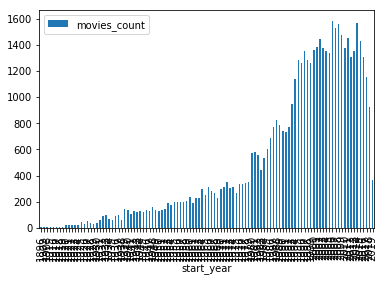

In [20]:
lgbt_movies_per_start_year.plot(kind="bar", x="start_year", y="movies_count")

In [ ]:
# Score: num_votes * rating

In [ ]:
Something with person and movie_person

In [ ]:
Something with awards